# The Sparks Foundation
## Data Science & Business Analytics Intern
## By  Liza Rani Choudhury

## Task 4

## Exploratory Data Analysis - Terrorism

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [134]:
plt.rcParams['figure.figsize']=[15,8]

In [13]:
#Loading the data into the dataframe
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='cp1252')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
#Checking the number of rows & columns present in the dataset
df.shape

(181691, 135)

    There are 181691 observations & 135 variables present in the dataset

In [15]:
#Selecting the important columns for our further study and renaming them
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack Type',
                   'targtype1_txt':'Target Type','gname':'Attack Group',
                   'weaptype1_txt':'Weapon Type','nkill':'No. of killings'},inplace=True)
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack Type,Target Type,Attack Group,Weapon Type,No. of killings
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [16]:
df.shape

(181691, 14)

    After removing the insignificant variables,the dataset now has 14 columns with 181691 observations.

#### Checking the Types of the data 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Extended         181691 non-null  int64  
 4   Country          181691 non-null  object 
 5   Region           181691 non-null  object 
 6   City             181257 non-null  object 
 7   Success          181691 non-null  int64  
 8   Suicide          181691 non-null  int64  
 9   Attack Type      181691 non-null  object 
 10  Target Type      181691 non-null  object 
 11  Attack Group     181691 non-null  object 
 12  Weapon Type      181691 non-null  object 
 13  No. of killings  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


    Data contain one float ,6 integer values & rest are object values.
    All the variables are non-null.

In [129]:
df['No. of killings']=df['No. of killings'].astype('int')

In [22]:
#Checking the duplicate values
df[df.duplicated()].shape

(15529, 14)

In [23]:
#Droping duplicate values
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(166162, 14)

In [28]:
df.describe()

,Year,Month,Day,Extended,Success,Suicide,No. of killings
count,166162.000000,166162.000000,166162.000000,166162.000000,166162.000000,166162.000000,157153.000000
mean,2003.077713,6.469325,15.522183,0.048134,0.888079,0.038980,2.566944
std,13.161186,3.390230,8.814884,0.214049,0.315270,0.193548,12.013689
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


    From above data, we can conclude that there are some columns which mean value is less than the median value (50%)
    in index  and there are some columns which mean value is greater than median value (50%).
    There is a huge difference between the 75% and max values of predictors “No. of killings"
                                                                                                                                Above observations, gives an indication that there are extreme values- deviations in our data set. We need to find the outliers.

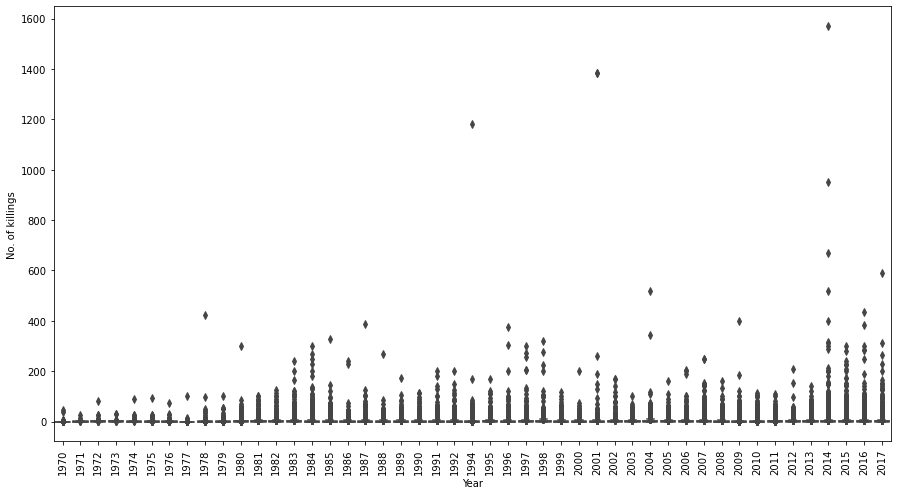

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Year'],y=df['No. of killings'])
plt.xticks(rotation=90)
plt.show()

    As we won't want to ignore the number of killing factor ,so we will move forward with the outliers.

In [50]:
#Checking the missing values
total=(df.isnull().sum()).sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
null_data=pd.concat([total,percent],axis=1,keys=['Total','percentage'])

In [51]:
null_data

,Total,percentage
No. of killings,9009,0.054218
City,411,0.002473
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Extended,0,0.000000
Country,0,0.000000
Region,0,0.000000
Success,0,0.000000
Suicide,0,0.000000


In [52]:
df['City']=df['City'].fillna('Unknown')
df['No. of killings']=df['No. of killings'].fillna(0)

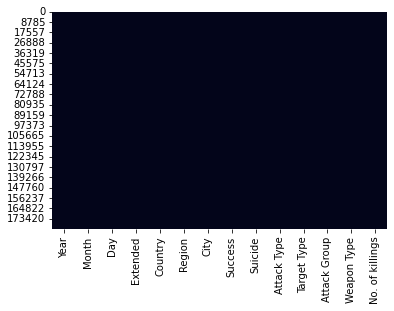

In [56]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

    From above we can see there is no missing values in the dataset. 
    Incase if there is any, we would have seen figure represented by different color shade on purple background.

#### Analyzing Individual Column

In [59]:
df.columns

Index(['Year', 'Month', 'Day', 'Extended', 'Country', 'Region', 'City',
       'Success', 'Suicide', 'Attack Type', 'Target Type', 'Attack Group',
       'Weapon Type', 'No. of killings'],
      dtype='object')

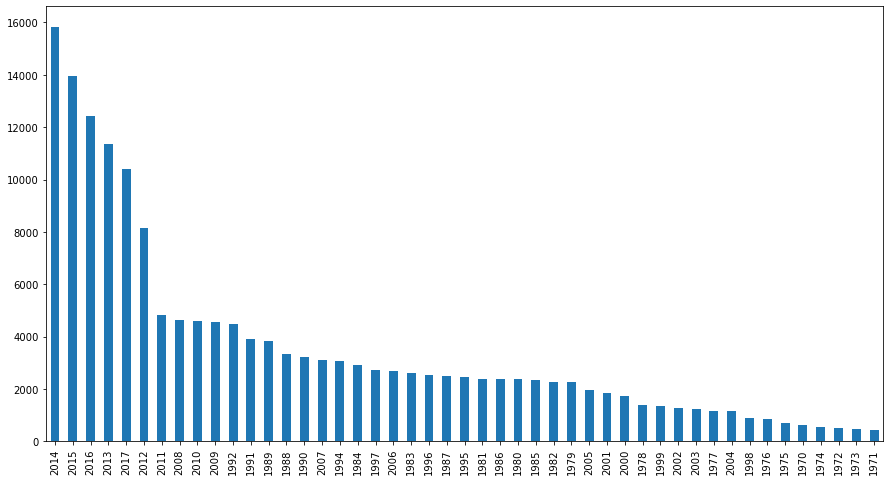

In [66]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.show()


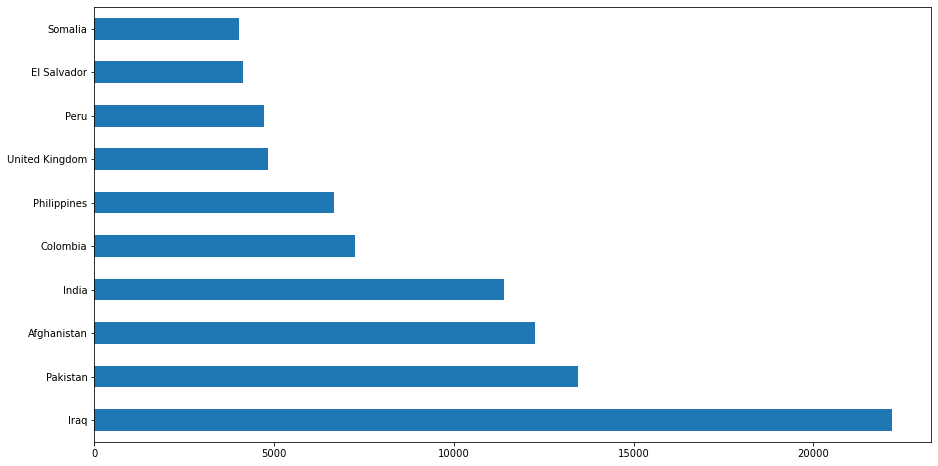

In [74]:
plt.figure(figsize=(15,8))
df['Country'].value_counts().iloc[:10].plot(kind='barh')
plt.show()


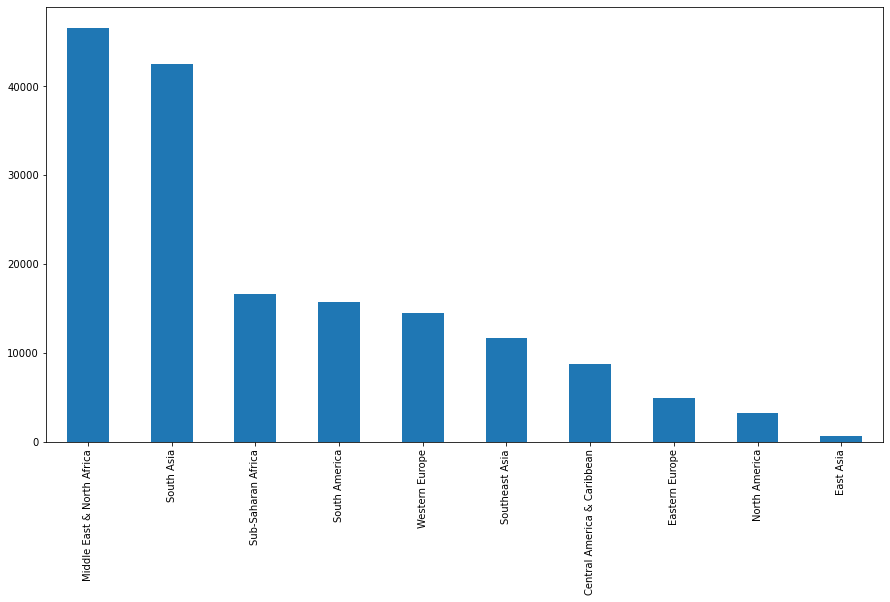

In [75]:
plt.figure(figsize=(15,8))
df['Region'].value_counts().iloc[:10].plot(kind='bar')
plt.show()


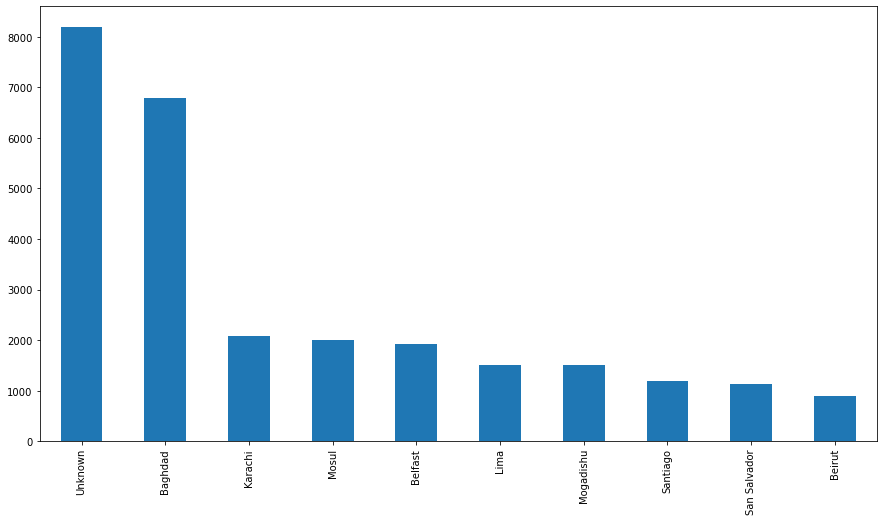

In [76]:
plt.figure(figsize=(15,8))
df['City'].value_counts().iloc[:10].plot(kind='bar')
plt.show()


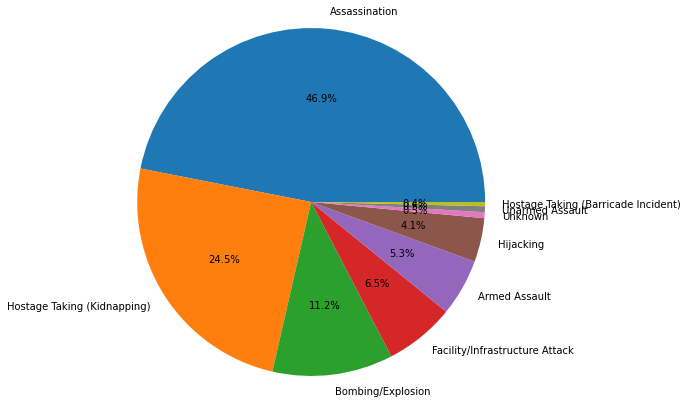

Bombing/Explosion                      0.469157
Armed Assault                          0.245056
Assassination                          0.112011
Hostage Taking (Kidnapping)            0.065195
Facility/Infrastructure Attack         0.052960
Unknown                                0.040761
Hostage Taking (Barricade Incident)    0.005489
Unarmed Assault                        0.005471
Hijacking                              0.003900
Name: Attack Type, dtype: float64


In [92]:
values=df['Attack Type'].value_counts()
names=df['Attack Type'].unique().tolist()
plt.pie(values,labels=names,radius=2,autopct='%1.1f%%')
plt.show()
print(values/len(df['Attack Type']))

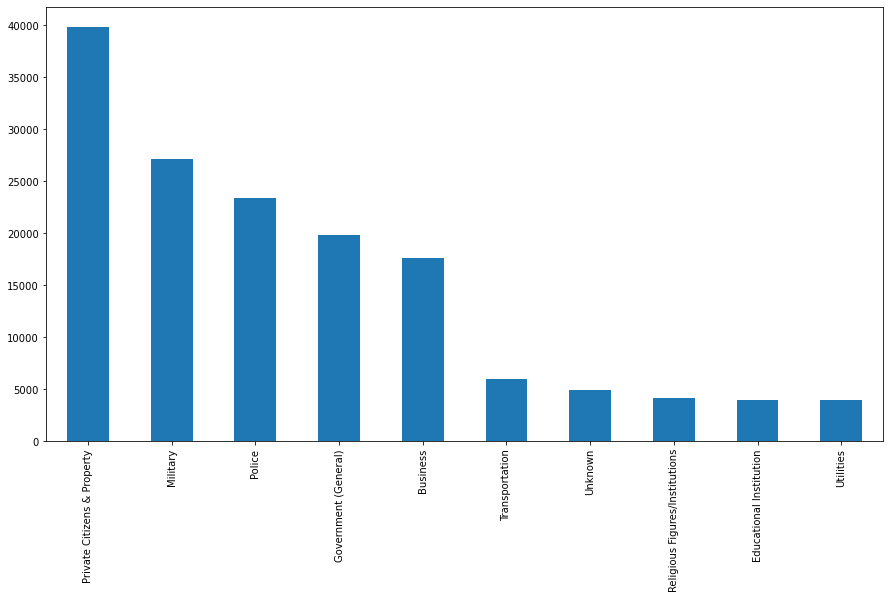

Private Citizens & Property       39771
Military                          27084
Police                            23374
Government (General)              19831
Business                          17613
Transportation                     5961
Unknown                            4946
Religious Figures/Institutions     4158
Educational Institution            3983
Utilities                          3948
Government (Diplomatic)            3403
Terrorists/Non-State Militia       2962
Journalists & Media                2808
Violent Political Party            1767
Airports & Aircraft                1297
NGO                                 947
Telecommunication                   880
Tourists                            425
Maritime                            336
Food or Water Supply                294
Abortion Related                    243
Other                               131
Name: Target Type, dtype: int64


In [97]:
plt.figure(figsize=(15,8))
df['Target Type'].value_counts().iloc[:10].plot(kind='bar')
plt.show()
print(df['Target Type'].value_counts())


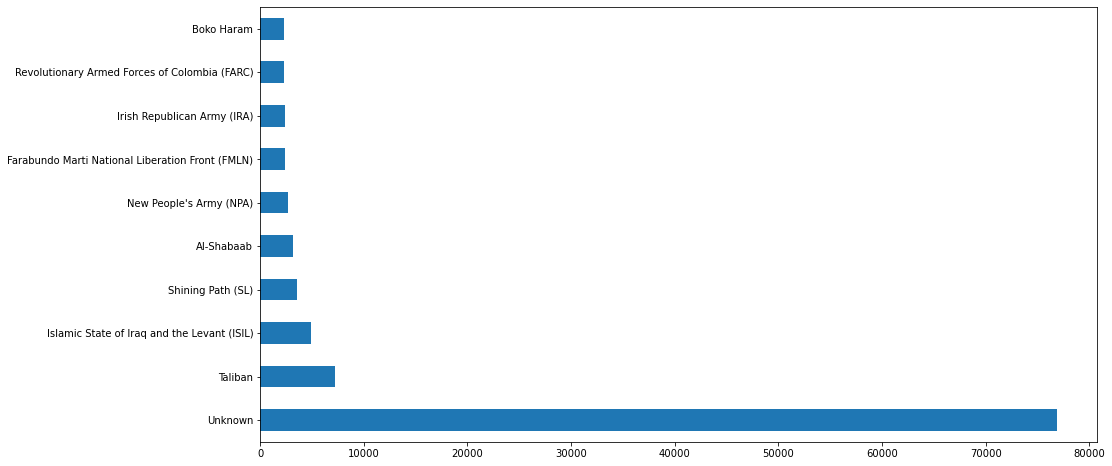

Unknown                                               76915
Taliban                                                7180
Islamic State of Iraq and the Levant (ISIL)            4893
Shining Path (SL)                                      3536
Al-Shabaab                                             3175
                                                      ...  
Al-Sunni muslim sect                                      1
Crazy Brabant Killers                                     1
Youth Gang                                                1
Proletarian Initiative and Offensive for W. Europe        1
MANO-D                                                    1
Name: Attack Group, Length: 3537, dtype: int64


In [114]:
plt.figure(figsize=(15,8))
df['Attack Group'].value_counts().iloc[:10].plot(kind='barh')
plt.show()
print(df['Attack Group'].value_counts())

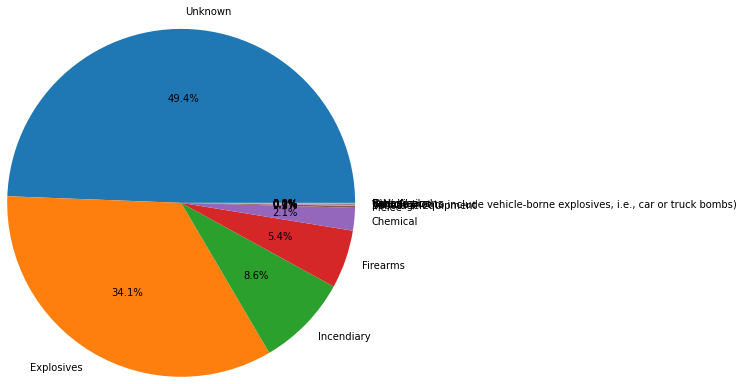

Explosives                                                                     0.493940
Firearms                                                                       0.340649
Unknown                                                                        0.085519
Incendiary                                                                     0.054254
Melee                                                                          0.021070
Chemical                                                                       0.001830
Sabotage Equipment                                                             0.000812
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)    0.000812
Other                                                                          0.000662
Biological                                                                     0.000211
Fake Weapons                                                                   0.000199
Radiological                    

In [106]:
values=df['Weapon Type'].value_counts()
names=df['Weapon Type'].unique().tolist()
plt.pie(values,labels=names,radius=2,autopct='%1.1f%%')
plt.show()
print(values/len(df['Weapon Type']))

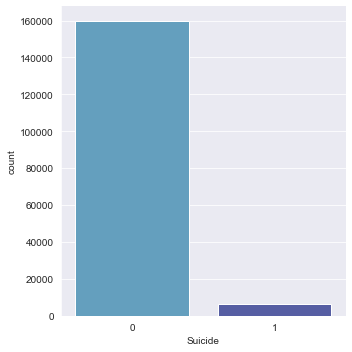

In [209]:
sns.factorplot('Suicide',data=df,kind='count')
plt.show()

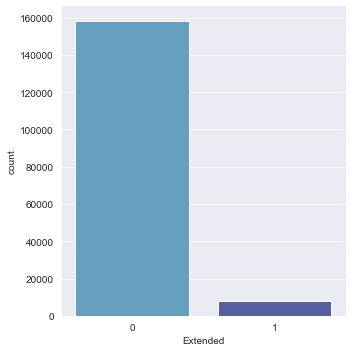

In [208]:
sns.factorplot('Extended',data=df,kind='count')
plt.show()

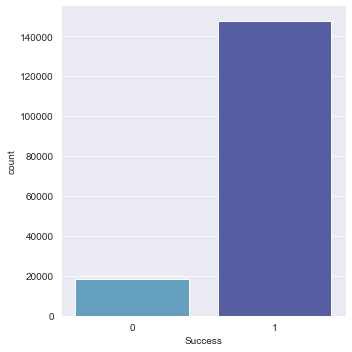

In [221]:
sns.factorplot('Success',data=df,kind='count')
plt.show()

## Bivariate Analysis

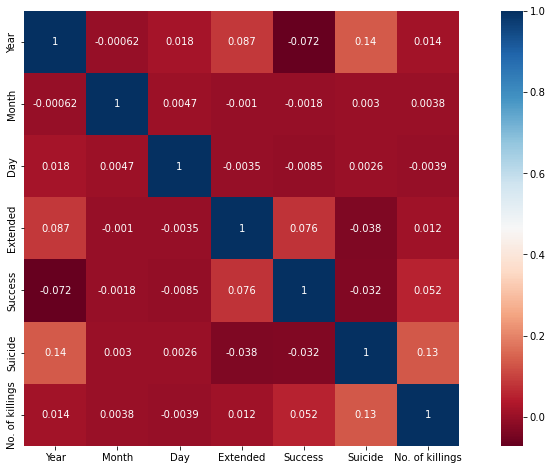

In [121]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),square=True,annot=True,cmap='RdBu',linecolor='black')
plt.show()

    No strong correlation was found between the variables as they are almost near to zero.

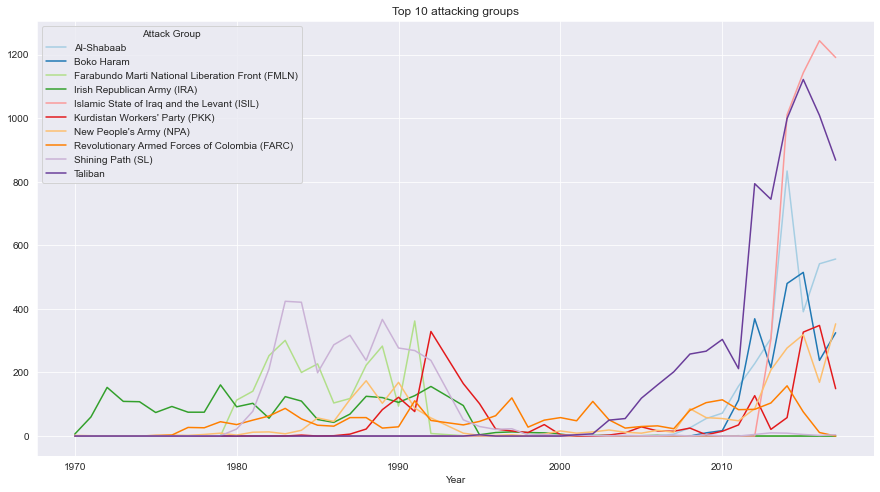

In [183]:
most_attacking_groups=df[df['Attack Group'].isin(df['Attack Group'].value_counts()[1:11].index)]
pd.crosstab(most_attacking_groups.Year,most_attacking_groups['Attack Group']).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Top 10 attacking groups")
plt.show()

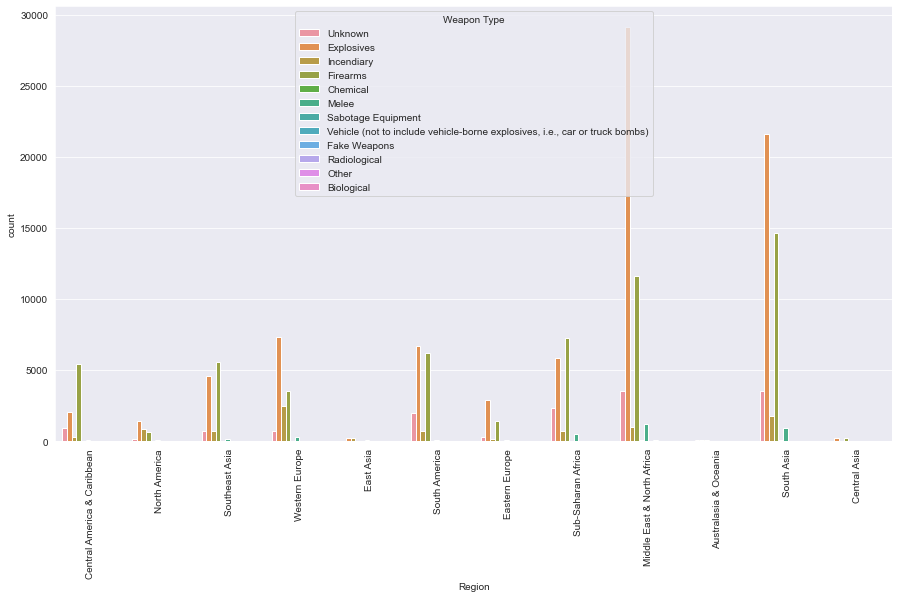

In [186]:
sns.countplot(x=df['Region'],hue=df['Weapon Type'])
plt.xticks(rotation=90)
plt.show()

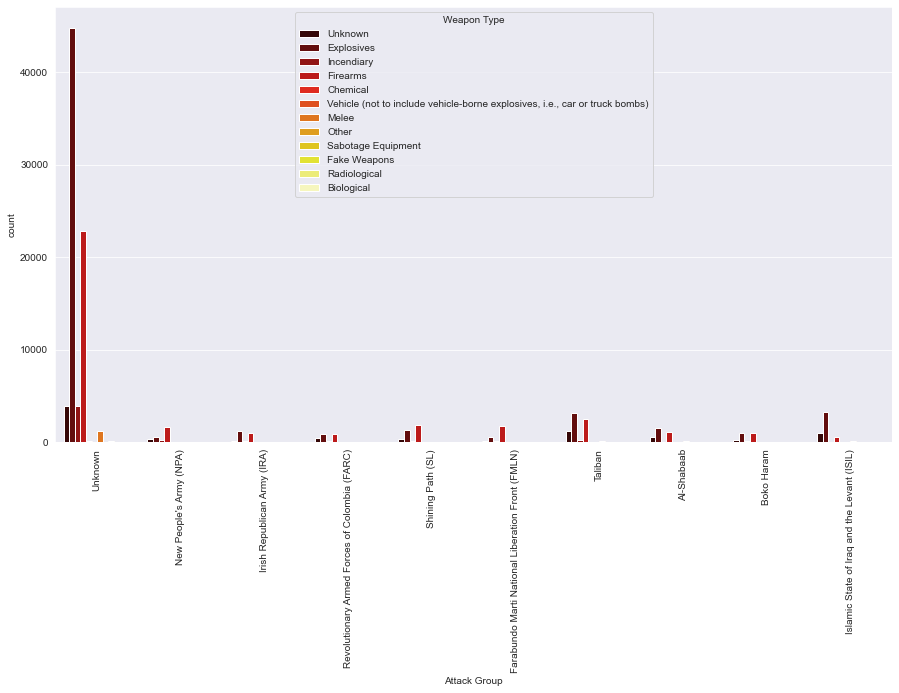

In [184]:
most_attacking_groups = df['Attack Group'].value_counts().index.tolist()[0:10]
df1 = df[['Attack Group','Weapon Type']]
most_used_weapon = df1[df1['Attack Group'].isin(most_attacking_groups)]
sns.countplot(x='Attack Group', hue ='Weapon Type', data = most_used_weapon,palette = "hot")
plt.xticks(rotation=90)
plt.show()

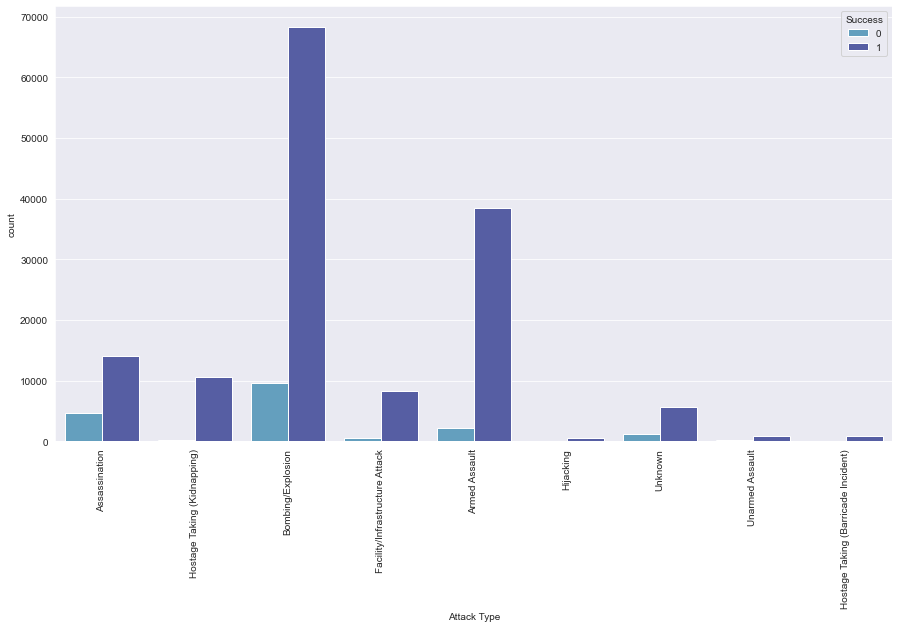

In [195]:
sns.countplot(df['Attack Type'],hue=df['Success'])
plt.xticks(rotation=90)
plt.show()

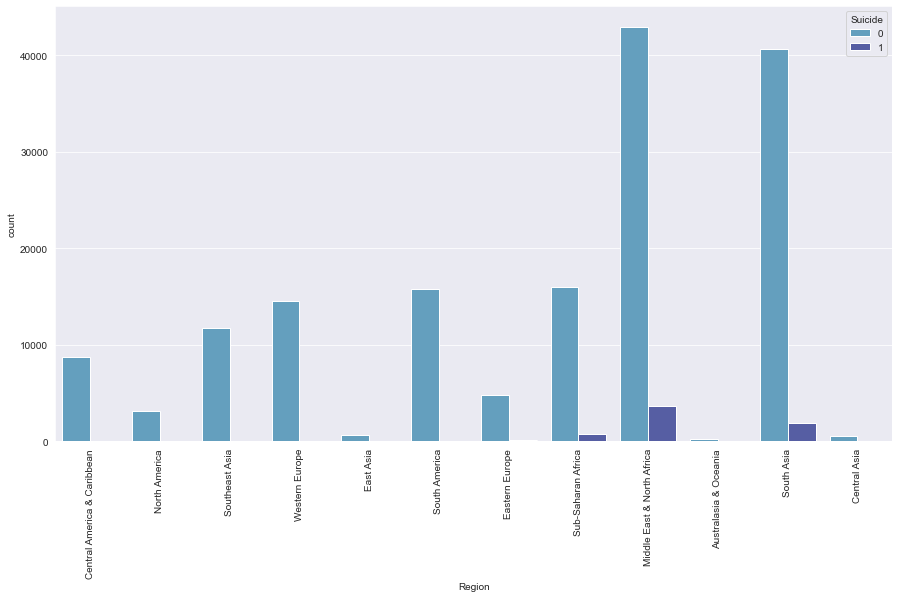

In [197]:
sns.countplot(df['Region'],hue=df['Suicide'])
plt.xticks(rotation=90)
plt.show()